In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# My modules
from generator import Generator

In [9]:
gen = Generator(12345) 

In [10]:
n = 10
start=0
end=100
random_ints = np.array([gen.next_int_from_to(end=end) for x in range(0, n)])

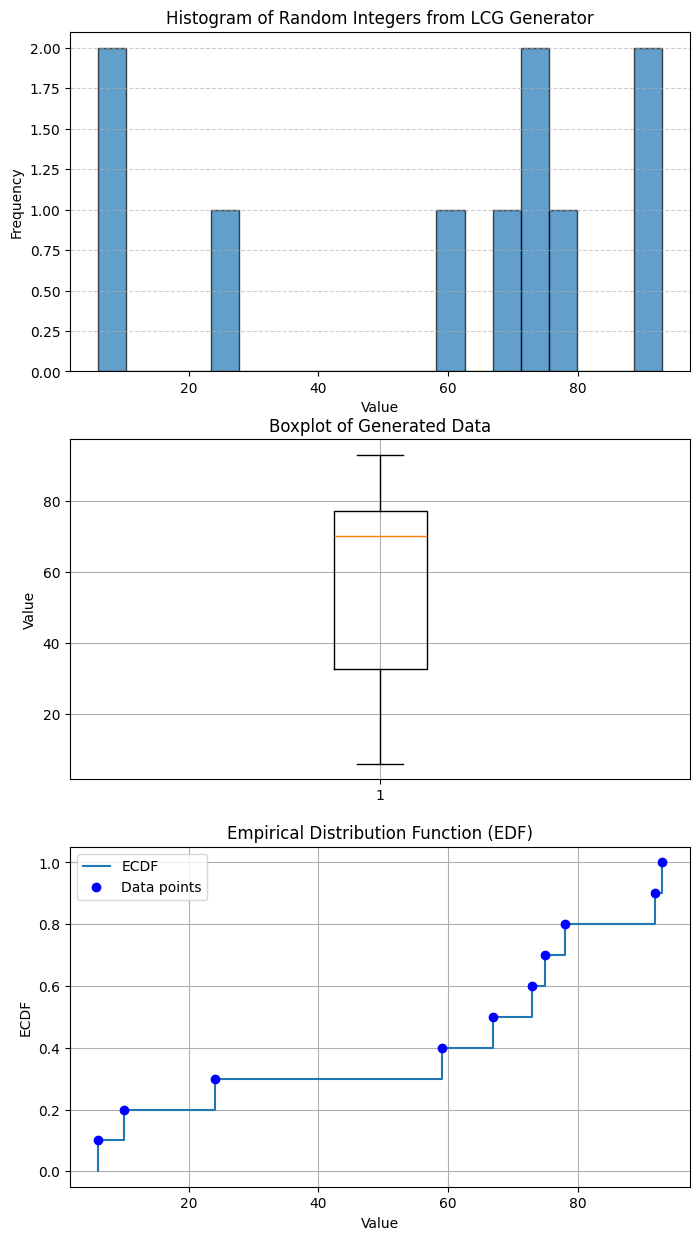

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# 1. Histogram
axs[0].hist(random_ints, bins=20, edgecolor='black', alpha=0.7)
axs[0].set_title("Histogram of Random Integers from LCG Generator")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# 2. Boxplot
axs[1].boxplot(random_ints, vert=True)
axs[1].set_title("Boxplot of Generated Data")
axs[1].set_ylabel("Value")
axs[1].grid(True)

# 3. Empirical Distribution Function (ECDF)
ecdf = ECDF(random_ints)
axs[2].step(ecdf.x, ecdf.y, where='post', label='ECDF')
axs[2].plot(ecdf.x, ecdf.y, 'o', markerfacecolor='blue', markeredgecolor='blue', label='Data points')
axs[2].set_title("Empirical Distribution Function (EDF)")
axs[2].set_xlabel("Value")
axs[2].set_ylabel("ECDF")
axs[2].grid(True)
axs[2].legend()